# || The Sparks Foundation || GRIPDEC20 DSBA Task 2

# Author: Meenakshi Vashistha

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Dataset

In [2]:
data=pd.read_csv("Iris.csv")

#### Exploring Dataset

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


![](iris.jpg)

In [5]:
data.shape

(150, 6)

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Creating different dataframes for Numericalal and categorical values

In [9]:
num=data.select_dtypes(include='number')

In [10]:
char=data.select_dtypes(include='object')

In [11]:
num.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [12]:
num.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


![](sepal_petal.jpg)

#### Character encoding

In [15]:
char_encode=pd.get_dummies(char)

In [17]:
char_encode.head()

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Joining dataframes to create a complete feature set

In [19]:
X_all=pd.concat([num,char_encode], axis=1, join='inner')

#### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_data=pd.DataFrame(stdsc.fit_transform(X_all),index=X_all.index,columns=X_all.columns).add_suffix('_std')

In [22]:
X_data.describe()

,Id_std,SepalLengthCm_std,SepalWidthCm_std,PetalLengthCm_std,PetalWidthCm_std,Species_Iris-setosa_std,Species_Iris-versicolor_std,Species_Iris-virginica_std
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,3.996803e-17,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16,-1.125026e-16,5.033011e-16,-2.220446e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542e+00,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,-7.071068e-01,-7.071068e-01,-7.071068e-01
25%,-8.602710e-01,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,-7.071068e-01,-7.071068e-01,-7.071068e-01
50%,0.000000e+00,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
75%,8.602710e-01,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,1.414214e+00,1.414214e+00,1.414214e+00
max,1.720542e+00,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,1.414214e+00,1.414214e+00,1.414214e+00


#### K-Means Clustering

##### WCSS Plot or Elbow Curve for Optimal cluster identification

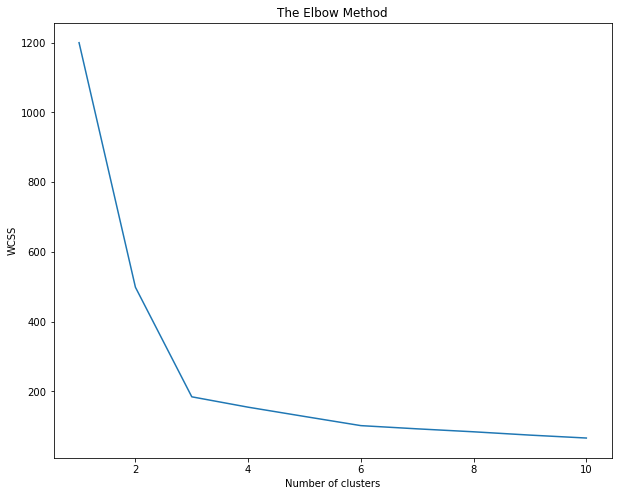

In [23]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K-Means Clustering & Cluster Information

In [24]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data)
data['Cluster_label']=pd.DataFrame(y_kmeans)

In [26]:
data.groupby('Cluster_label')['SepalLengthCm'].agg(['count'])

,count
Cluster_label,
0,50
1,50
2,50


In [31]:
data.groupby('Cluster_label')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'Species'].agg(['mean'])

<ipython-input-31-d8e7fad2679e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Cluster_label')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'Species'].agg(['mean'])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,mean,mean,mean,mean
Cluster_label,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


#### Plotting Clusters with Swarmplot

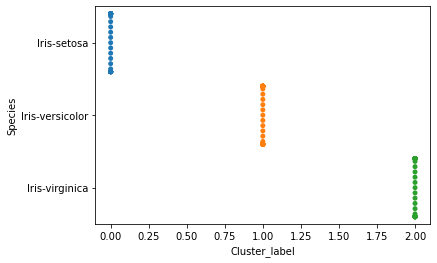

In [34]:
import seaborn as sns
ax=sns.swarmplot(x="Cluster_label",y="Species",data=data)

##### Iris-setosa: Cluster_label '0'           Iris-versicolor: Cluster_label '1'                       Iris-virginica: Cluster_label '2'                                                                                                  
###### 'SepalLengthCm'- 5.006                                                   'SepalLengthCm'- 5.936                                              'SepalLengthCm'-6.588	
###### 'SepalWidthCm' - 3.418                                                    'SepalWidthCm' - 2.770                                                'SepalWidthCm' - 2.974
###### 'PetalLengthCm'- 1.464                                                    'PetalLengthCm'- 4.260                                                'PetalLengthCm' - 5.552	
###### 'PetalWidthCm' - 0.244                                                     'PetalWidthCm' - 1.326                                                 'PetalWidthCm' -  2.026
                                 